In [193]:
import numpy as np
np.random.seed(42)

In [141]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [142]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

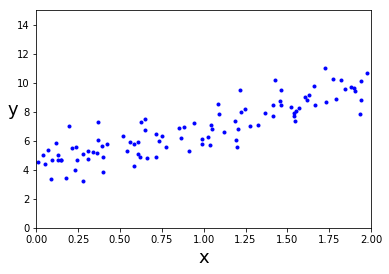

In [143]:
plt.plot(X,y,"b.")
plt.xlabel("x",fontsize=18)
plt.ylabel("y",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [144]:
X_b=np.c_[np.ones((100,1)),X]

In [145]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [146]:
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [147]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]

In [148]:
y_predict=X_new_b.dot(theta_best)

In [149]:
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

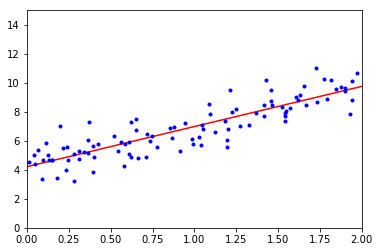

In [150]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [151]:
eta=0.1
n_iterations=1000
m=100

In [152]:
theta=np.random.randn(2,1)

In [153]:
theta

array([[ 0.01300189],
       [ 1.45353408]])

In [154]:
for i in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient

In [155]:
theta

array([[ 4.21509616],
       [ 2.77011339]])

In [156]:
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)

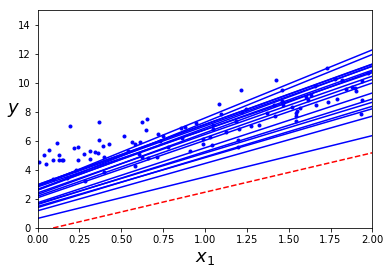

In [157]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style) 
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradient=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-gradient*eta
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                               # not shown
plt.show() 

In [158]:
theta

array([[ 4.18475289],
       [ 2.73036719]])

In [159]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [160]:
sgd_reg.intercept_

array([ 4.2287996])

In [161]:
sgd_reg.coef_

array([ 2.79011436])

In [194]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

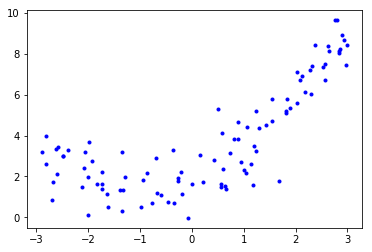

In [163]:
plt.plot(X,y,'b.')
plt.show()

In [164]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

In [165]:
X[0]

array([ 2.94407494])

In [166]:
X_poly[0]

array([ 2.94407494,  8.66757727])

In [167]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
lin_reg.intercept_

array([ 1.89554823])

In [169]:
lin_reg.coef_

array([[ 0.95707476,  0.49025797]])

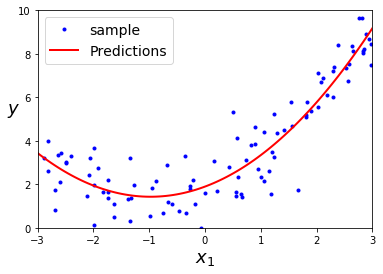

In [170]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.",label="sample")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

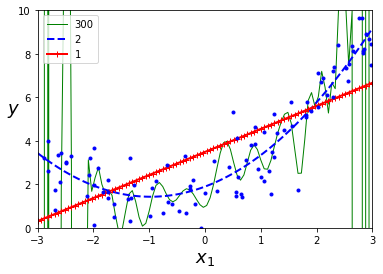

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [190]:
X

array([[  2.94407494e+00],
       [  1.54038100e+00],
       [ -3.46237167e-01],
       [  1.24438200e+00],
       [ -6.64617170e-01],
       [ -1.62674723e+00],
       [  5.81111261e-01],
       [  2.56909259e+00],
       [  2.57483712e+00],
       [ -9.48568331e-01],
       [  1.66064797e-01],
       [ -1.73018461e+00],
       [  2.97378666e+00],
       [  2.88670745e+00],
       [  8.97053578e-01],
       [  1.82648436e+00],
       [  1.29060097e+00],
       [  5.58949314e-01],
       [ -2.67991202e+00],
       [ -2.71413945e-01],
       [  1.04871781e+00],
       [  1.06518968e+00],
       [ -7.61264289e-01],
       [  2.65015192e+00],
       [ -1.99585781e+00],
       [  2.15667729e-03],
       [  1.14530386e+00],
       [  1.18281484e+00],
       [  8.91833741e-01],
       [ -1.34827072e+00],
       [ -2.06276059e+00],
       [  8.15641961e-01],
       [  5.95812697e-01],
       [ -1.92386394e+00],
       [  1.23083487e+00],
       [ -2.68968050e-01],
       [  1.00656355e+00],
 

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [196]:
def plot_learning_curve(model,X,y):
    
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=2,label="val")
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("training set size",fontsize=14)
    plt.ylabel("rmse",fontsize=18)
    

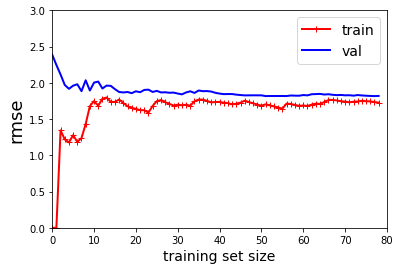

In [197]:
lin_reg=LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()

In [198]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([("poly_features",PolynomialFeatures(degree=10,include_bias=False)),("lin_reg",LinearRegression())])

In [199]:
polynomial_regression

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

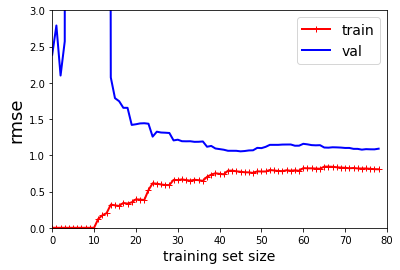

In [201]:
plot_learning_curve(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

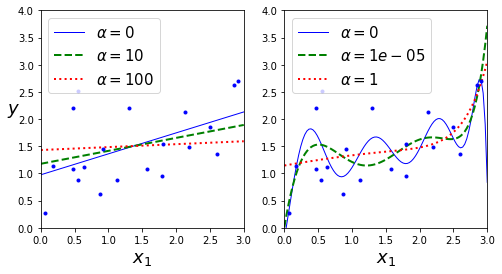

In [218]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()

In [203]:
from sklearn.linear_model import Ridge

In [213]:
ridge_reg=Ridge(alpha=1.0,solver="cholesky",random_state=42)
ridge_reg.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001)

In [214]:
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

In [215]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2",random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.13500145])

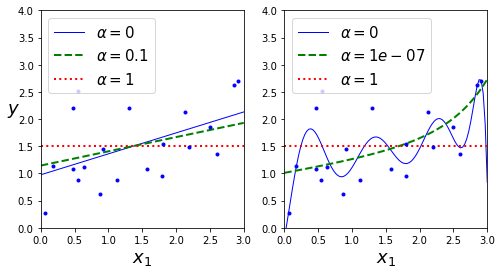

In [219]:
from sklearn.linear_model import Lasso


plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1),tol=1, random_state=42)


plt.show()

In [221]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

In [224]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l1",alpha=0.1,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.1027679])

In [225]:
from sklearn.linear_model import ElasticNet

In [226]:
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)


In [228]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [229]:
elastic_net.predict([[1.5]])

array([ 1.54333232])